In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math as math
import nsfg
import random
import first

## PValues

In [2]:
n = 250
coin = ['H','T']
heads = 140
tails = 110
delta_actual = abs(heads-tails)
iters = 1000

def get_delta():
    choices = np.random.choice(coin,n)
    results = pd.DataFrame(choices,columns=['result'])
    return abs(np.sum(results.result=="T")-np.sum(results.result!="T"))


test=[]
for _ in range(iters):
    test.append(get_delta())
    


PValue = sum(1  for t in test if t>=delta_actual)

print PValue/iters


0.065


In [3]:
n=250
head = 140
tails = 110
actual = abs(head-tails)
m = 1000
x_delta=[]

#compute the times that the delta between H and T is bigger than the actual, and divide it by the number of iterations.

def generateData():
    xs = pd.DataFrame(np.random.choice(['T','H'],n),columns=["Result"])
    data = xs.Result.value_counts()
    
    return abs(data.ix['H']-data.ix['T'])
    
x_delta =np.asarray([generateData() for _ in range(m)])


result = np.sum(x_delta>= actual)

print result/m

0.062


# Testing a difference in Means

0.165


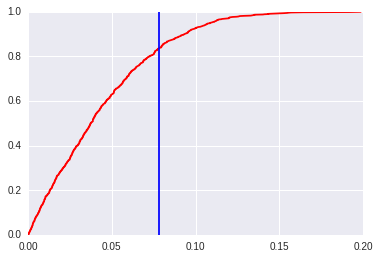

In [4]:
live,firsts,others = first.MakeFrames()
data = firsts.prglngth.values,others.prglngth.values


m = 1000

n = data[0].shape[0]

mean_firsts = data[0].mean()
mean_others = data[1].mean()

delta_actual =  abs(mean_firsts-mean_others)

#shuffle two sets:
reshuffle = np.hstack(data)

def compute_delta_mean_test():
    np.random.shuffle(reshuffle)

    #compute delta means:
    test_set =  abs(reshuffle[:n].mean()-reshuffle[n:].mean())
    return test_set

test_list = np.asarray([compute_delta_mean_test() for i in range(m)])
test_list.sort()


CDF = np.array(range(test_list.shape[0]))/float(test_list.shape[0])
plt.plot(test_list,CDF,color='r')


pValue = np.sum(test_list>=delta_actual)/m

plt.axvline(delta_actual) 
print pValue


# Testing a difference in Pearson Correlation

In [14]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg','totalwgt_lb'])

#Actual Pearson's correlation :
live = live[['agepreg','totalwgt_lb']]
actual_corr = (np.corrcoef(live.agepreg,live.totalwgt_lb)).reshape(-1,1)
actual_corr

# prepare sample et reshuffle:
def get_mean_correlation():
    xs,ys = live.agepreg,live.totalwgt_lb
    xs = np.random.permutation(xs)
    corr = stats.pearsonr(xs,ys)[0]
    return corr


test_sample = [get_mean_correlation() for _  in range(m)]

test_sample = np.asarray(test_sample)

pValue = np.sum(test_sample>=actual_corr)/m
print pValue

    


0.0


## Testing proportions

In [6]:
observed = np.asarray([8,9,19,5,8,11])

number_of_throws = 60
test =[]


def get_data():
    throws =np.random.choice(range(1,7),60) 
    df_throws =  pd.DataFrame(throws, columns=['result'])
    throws_result = df_throws.result.value_counts()
    
    return np.sum(abs(throws_result.as_matrix()-10))
    
    
test = [get_data() for _ in range(m)]
test = np.asarray(test)
pValue = np.sum(test>=20)/m
print pValue
    

0.135


## Chi-square test

In [7]:
observed = np.asarray([8,9,19,5,8,11])


test =[]
m = 1000

def get_data():
    throws =np.random.choice(range(1,7),60) 
    df_throws =  pd.DataFrame(throws, columns=['result'])
    throws_result = df_throws.result.value_counts()
    
    return np.sum((abs(throws_result.as_matrix()-10))**2/10)
    
XiDeux_observed = np.sum((abs(observed-10))**2/10)

print XiDeux_observed
test = [get_data() for _ in range(m)]
test = np.asarray(test)
pValue = np.sum(test>=XiDeux_observed)/m
print pValue

stats.chisquare(observed,[10 for _ in range(6)])
    

11.6
0.04


Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

##  Example from wiki

In [8]:
observed = np.asarray([88,109,107,94,105,97])
stats.chisquare(observed,[100 for _ in range(6)])

Power_divergenceResult(statistic=3.4399999999999999, pvalue=0.63248520036629086)

## First Babies again